In [1]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_PATH = "drive/MyDrive/Covid-19(3)/Train"
VAL_PATH = "drive/MyDrive/Covid-19(3)/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [7]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2,horizontal_flip = True,)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('drive/MyDrive/Covid-19(3)/Train',target_size = (224,224),batch_size = 32, class_mode = 'binary')

Found 9060 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory('drive/MyDrive/Covid-19(3)/Val',target_size = (224,224),batch_size = 32,class_mode = 'binary')

Found 5382 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
8/8 [==============================] - 263s 34s/step - loss: 1.0858 - accuracy: 0.6055 - val_loss: 0.5276 - val_accuracy: 0.8281
Epoch 2/10
8/8 [==============================] - 100s 12s/step - loss: 0.6941 - accuracy: 0.6875 - val_loss: 0.6833 - val_accuracy: 0.7656
Epoch 3/10
8/8 [==============================] - 100s 13s/step - loss: 0.6516 - accuracy: 0.6797 - val_loss: 0.6085 - val_accuracy: 0.8281
Epoch 4/10
8/8 [==============================] - 99s 12s/step - loss: 0.6902 - accuracy: 0.6484 - val_loss: 0.6697 - val_accuracy: 0.7812
Epoch 5/10
8/8 [==============================] - 97s 12s/step - loss: 0.6392 - accuracy: 0.6992 - val_loss: 0.6341 - val_accuracy: 0.7188
Epoch 6/10
8/8 [==============================] - 95s 12s/step - loss: 0.6236 - accuracy: 0.6953 - val_loss: 0.6423 - val_accuracy: 0.6875
Epoch 7/10
8/8 [==============================] - 96s 12s/step - loss: 0.6362 - accuracy: 0.6797 - val_loss: 0.6260 - val_accuracy: 0.7188
Epoch 8/10
8/8 [========

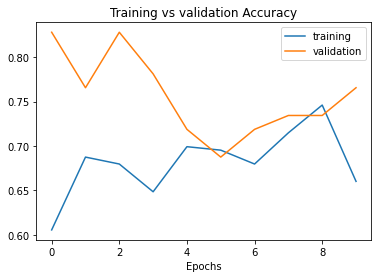

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [12]:
from google.colab import files
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training vs validation Accuracy')
plt.xlabel('Epochs')
plt.show()
plt.savefig('model_3_accuracy.png')
files.download('model_3_accuracy.png')

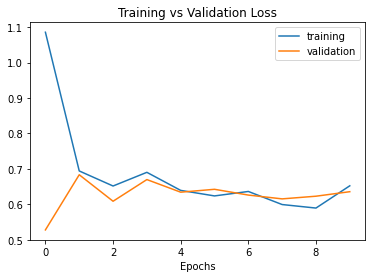

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
model.save("model3.h5")